In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8887
Test accuracy: 0.888700008392334
Test accuracy: 88.87%


In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8895
Test accuracy: 0.8895000219345093
Test accuracy: 88.95%


In [ ]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28, 28)))
model1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model1.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8732
Test accuracy: 0.873199999332428
Test accuracy: 87.32%


In [ ]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28, 28)))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer= 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8878
Test accuracy: 0.8877999782562256
Test accuracy: 88.78%


In [ ]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(28, 28)))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model3.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8834
Test accuracy: 0.883400022983551
Test accuracy: 88.34%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(28, 28)))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

model4.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)

history = model4.fit(train_images, train_labels, batch_size=64,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

test_loss, test_acc = model4.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/50
938/938 - 6s - loss: 0.7005 - accuracy: 0.7788 - val_loss: 0.4882 - val_accuracy: 0.8326 - lr: 1.0000e-04 - 6s/epoch - 6ms/step
Epoch 2/50
938/938 - 5s - loss: 0.4345 - accuracy: 0.8486 - val_loss: 0.4366 - val_accuracy: 0.8461 - lr: 1.0000e-04 - 5s/epoch - 5ms/step
Epoch 3/50
938/938 - 4s - loss: 0.3923 - accuracy: 0.8613 - val_loss: 0.4160 - val_accuracy: 0.8531 - lr: 1.0000e-04 - 4s/epoch - 5ms/step
Epoch 4/50
938/938 - 5s - loss: 0.3657 - accuracy: 0.8699 - val_loss: 0.3906 - val_accuracy: 0.8635 - lr: 1.0000e-04 - 5s/epoch - 6ms/step
Epoch 5/50
938/938 - 4s - loss: 0.3465 - accuracy: 0.8767 - val_loss: 0.3803 - val_accuracy: 0.8657 - lr: 1.0000e-04 - 4s/epoch - 5ms/step
Epoch 6/50
938/938 - 5s - loss: 0.3317 - accuracy: 0.8817 - val_loss: 0.3782 - val_accuracy: 0.8655 - lr: 1.0000e-04 - 5s/epoch - 5ms/step
Epoch 7/50
938/938 - 5s - loss: 0.3183 - accuracy: 0.8871 - val_loss: 0.3711 - val_accuracy: 0.8678 - lr: 1.0000e-04 - 5s/epoch - 6ms/step
Epoch 8/50
938/938 - 4s - l

In [ ]:
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.Flatten())
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчаємо модель
history = model5.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model5.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/20
469/469 [==============================] - 47s 96ms/step - loss: 0.6184 - accuracy: 0.7746 - val_loss: 0.4416 - val_accuracy: 0.8411
Epoch 2/20
469/469 [==============================] - 50s 107ms/step - loss: 0.3817 - accuracy: 0.8626 - val_loss: 0.3654 - val_accuracy: 0.8682
Epoch 3/20
469/469 [==============================] - 44s 94ms/step - loss: 0.3230 - accuracy: 0.8835 - val_loss: 0.3212 - val_accuracy: 0.8834
Epoch 4/20
469/469 [==============================] - 43s 92ms/step - loss: 0.2911 - accuracy: 0.8943 - val_loss: 0.3107 - val_accuracy: 0.8863
Epoch 5/20
469/469 [==============================] - 44s 93ms/step - loss: 0.2678 - accuracy: 0.9028 - val_loss: 0.2851 - val_accuracy: 0.8953
Epoch 6/20
469/469 [==============================] - 43s 92ms/step - loss: 0.2467 - accuracy: 0.9089 - val_loss: 0.2815 - val_accuracy: 0.8966
Epoch 7/20
469/469 [==============================] - 43s 91ms/step - loss: 0.2321 - accuracy: 0.9149 - val_loss: 0.2835 - val_accuracy

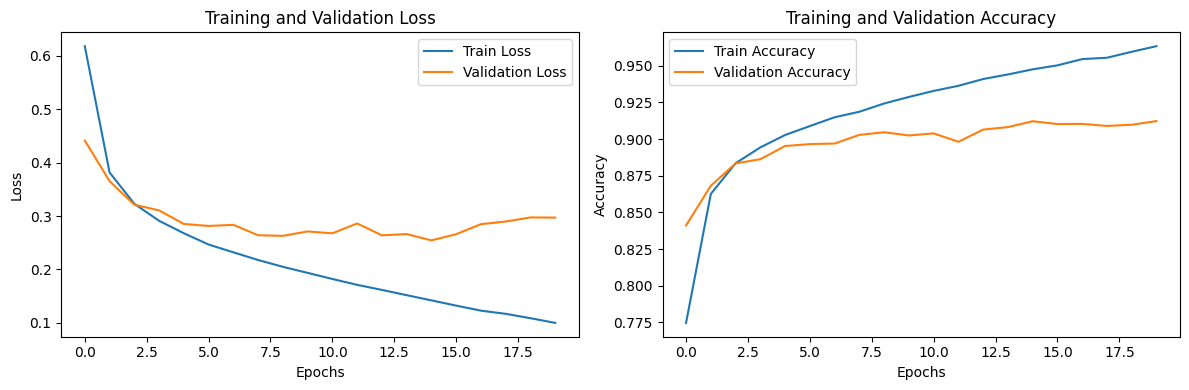

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)